# Data Analysis and Supervised Learning

In [2]:
import pandas as pd

housing_data = pd.read_csv('../datasets/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. You can use the `info()` method to view a quick description of the data.

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


You can find out what categories exist and how many districst belong to each category by using the `value_counts()` method.

In [4]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The `describe()` method shows a summary of the numerical attributes.

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute.

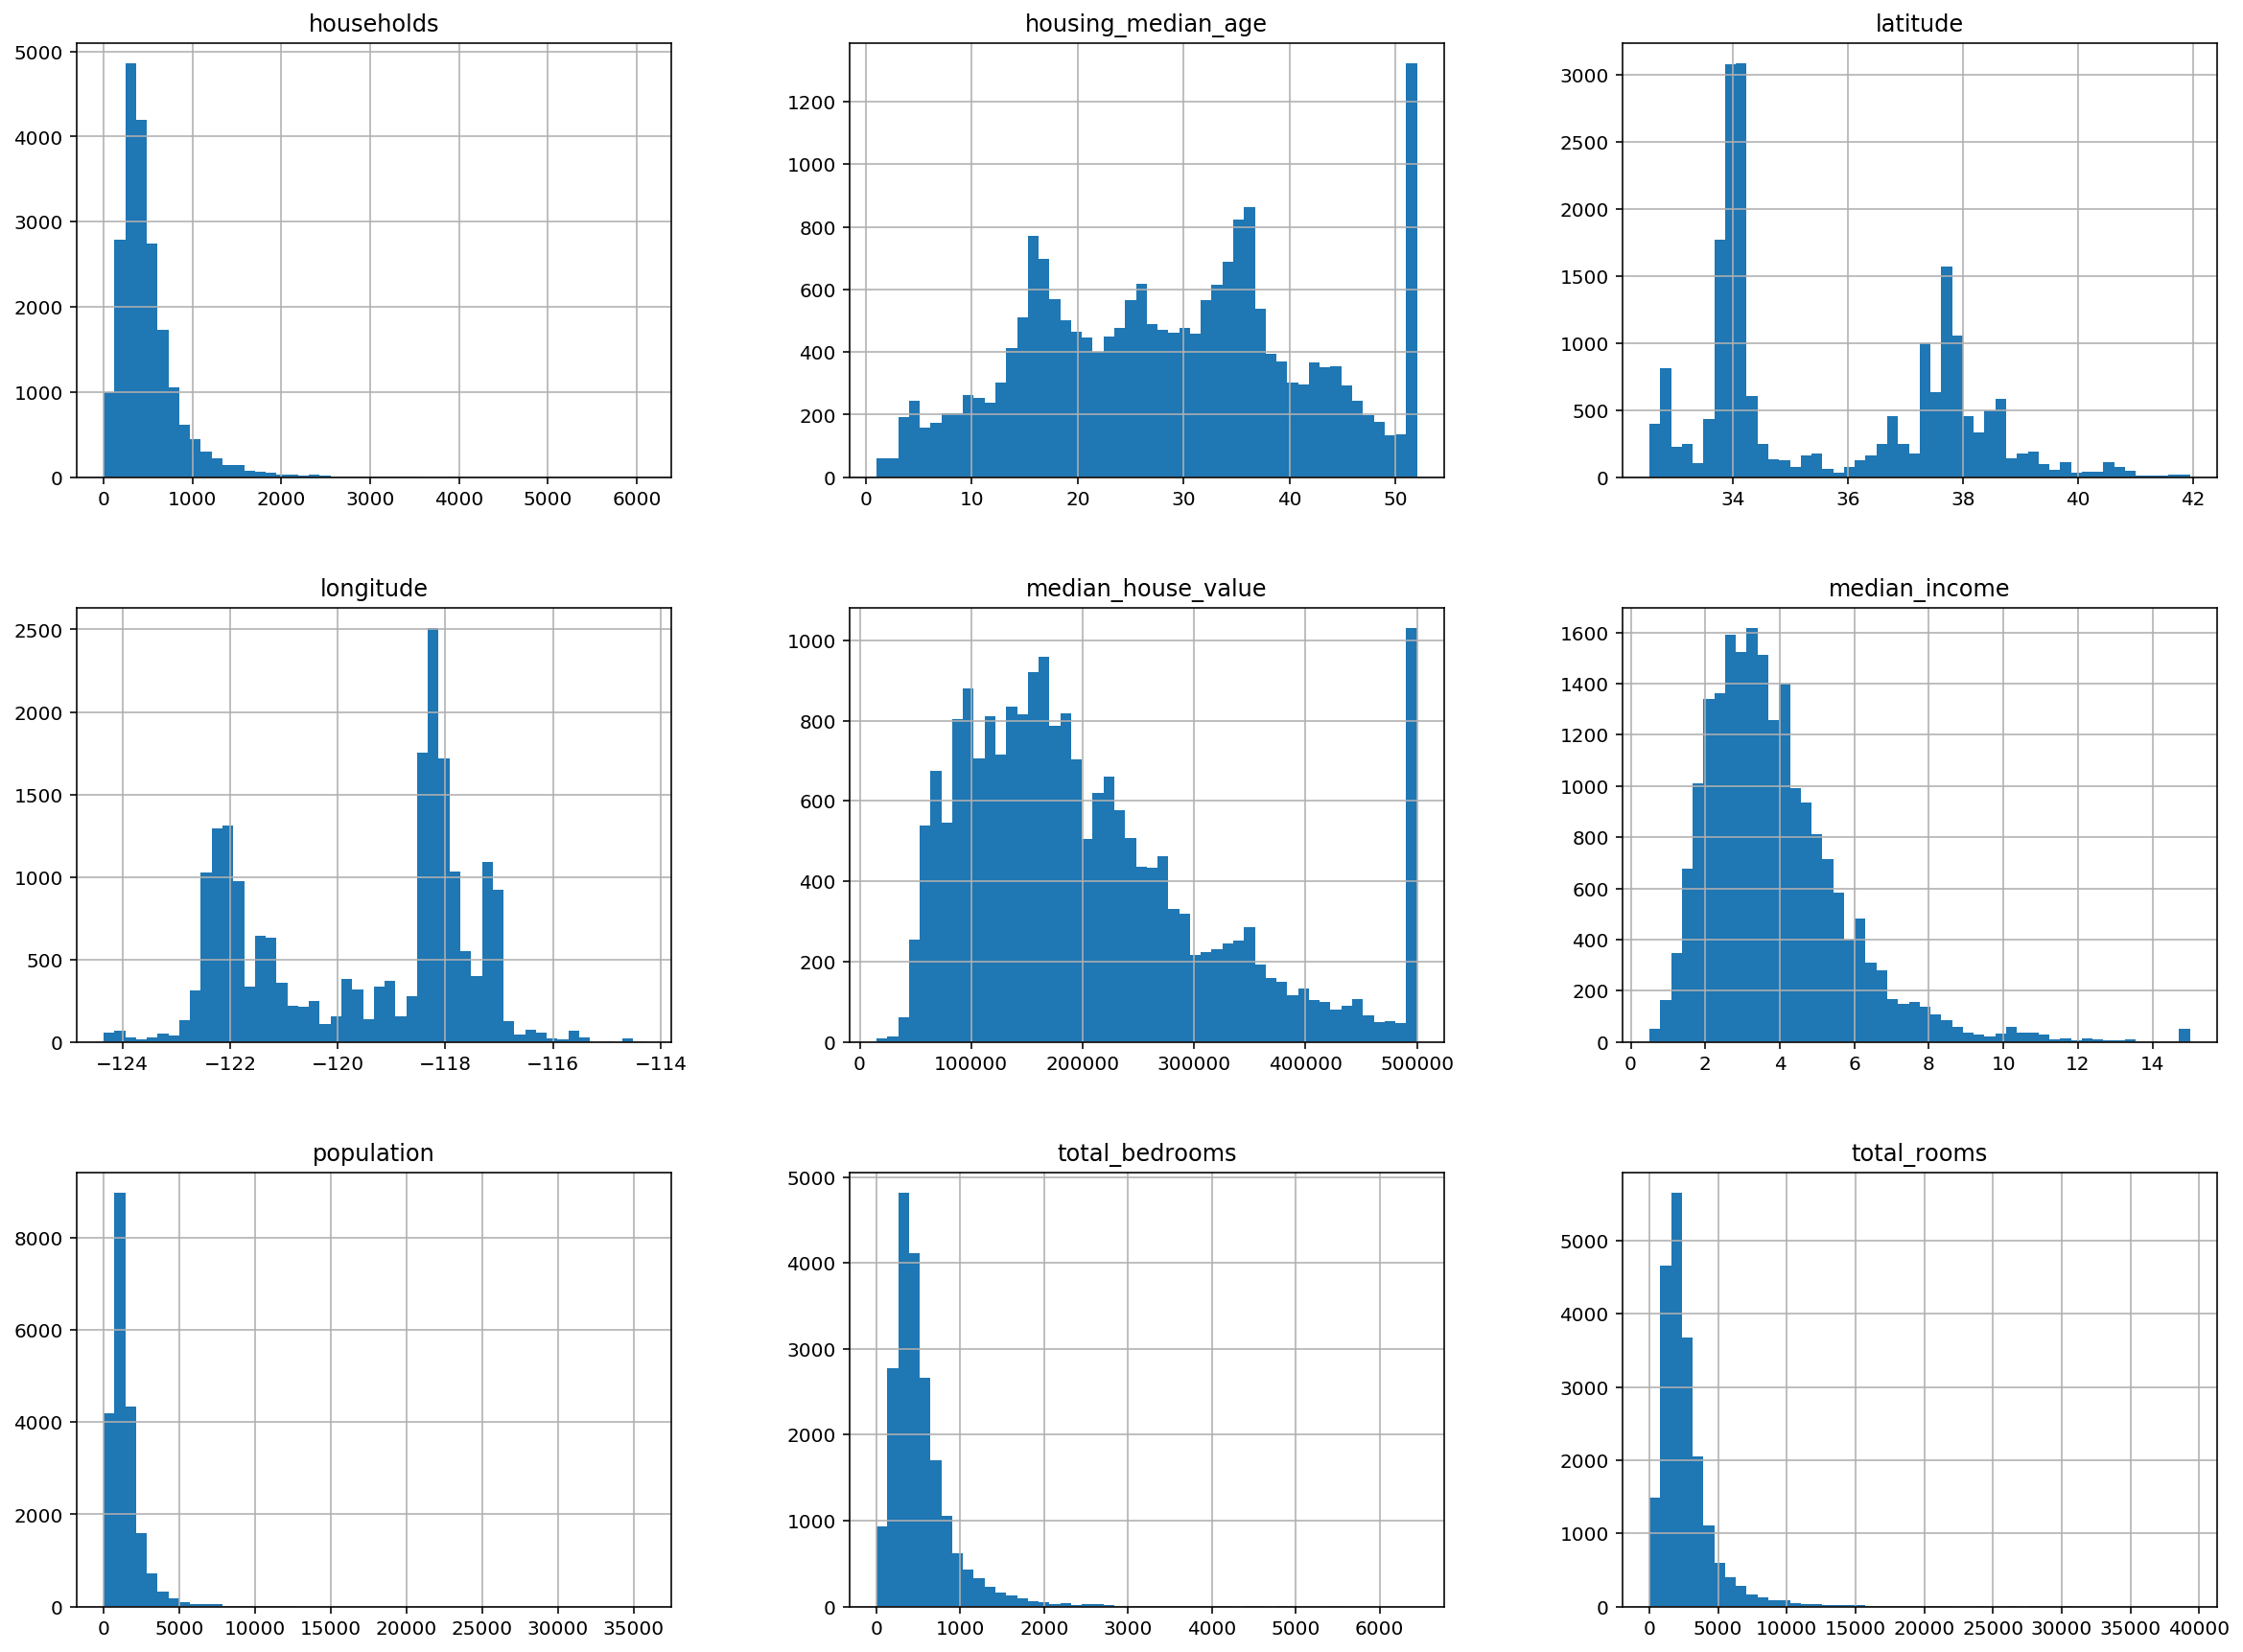

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. One of them is `train_test_split()`. First there is a `randon_state` parameter that allows you to set the random generator seed as explained previously, and second you can pass it multiple datasets with an indentical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels).

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

Suppose the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of income in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute.

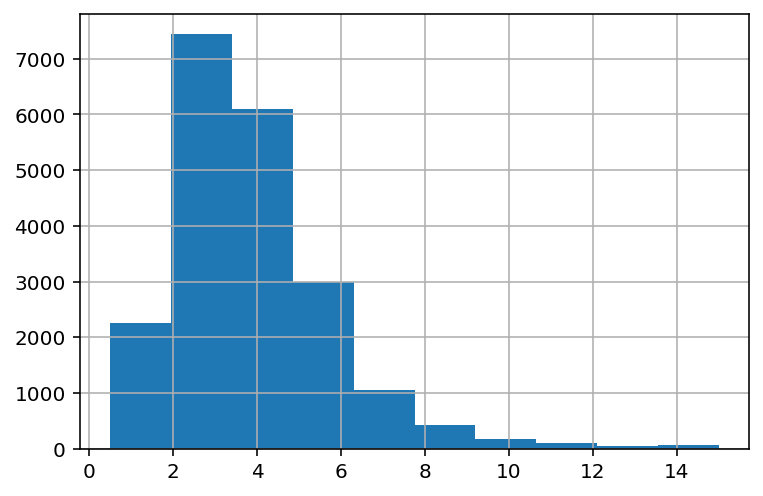

In [8]:
housing_data["median_income"].hist()

Median income values are clustered around 2-5, but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each *stratum*.

The following code creates an income category attribute:

In [9]:
import numpy as np

housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5, 5.0, inplace=True)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


Use Scikit-Learn's `StratifiedShuffleSplit` class to get a homogenous selection in their respective sets.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [11]:
housing_data["income_cat"].value_counts() / len(housing_data)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

Now that you have your data structured in the way you want, you should remove the `income_cat` attribute so the data is back to its original state.

In [12]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights
First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. Let's create a copy so you can play with it without hearming the training set.

In [13]:
housing = strat_train_set.copy()

### Visualizing Geographical Data
We can use the attributes *longitude* and *latitude* to create a scatter plot to visualize the data.

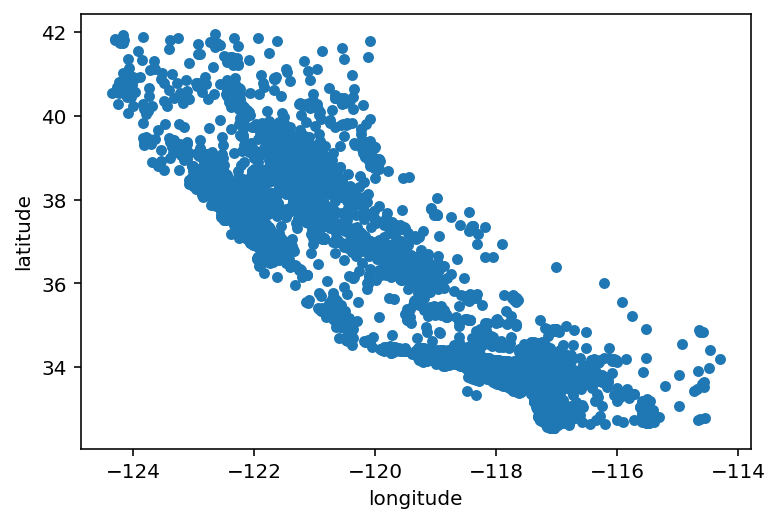

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude")

While the shape looks like California, it is hard to see any particular pattern. If we set the `alpha` option to 0.1, it will be much easier to visualize places where there is a high density of data points.

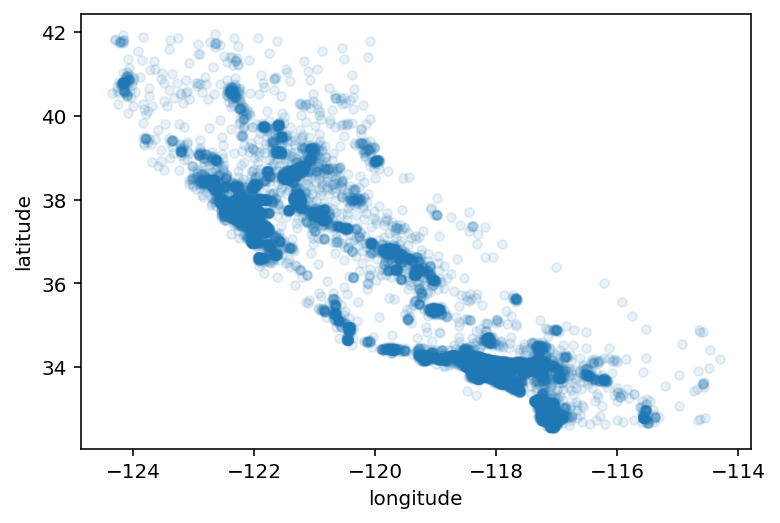

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Looking back at our housing prices. The radius of each circle represents the district's population (option `s`), and the color represents the price (option `c`). There is a predefined map called `jet`, which ranges from blue (low values) to red (high values).

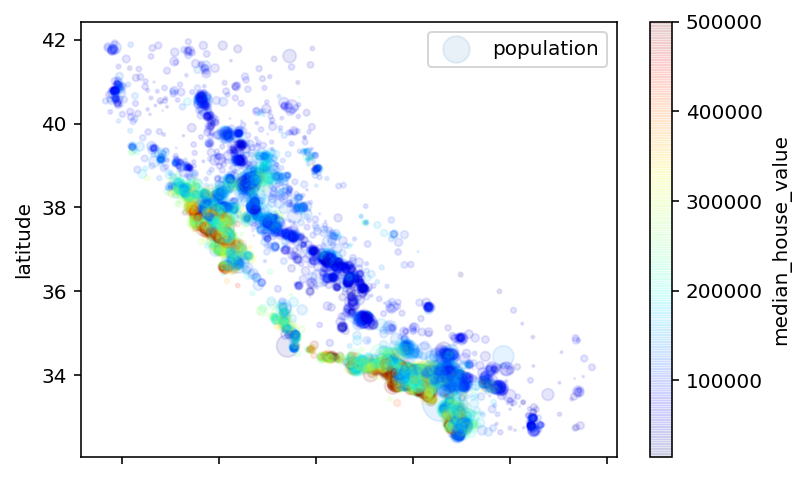

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=housing["population"] / 100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

As you can see, the map indicates that the housing prices are closely related to the location, and to the population density. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well.

### Looking for Correlations
Since the dataset is not too large, you can easily compute the standard correlation coefficient (*Pearson's r*)